In [88]:
# #project 2
# import pandas as pd
# from pathlib import Path
# import numpy as np

# Imports
import pandas as pd
import numpy as np
from pathlib import Path
import hvplot.pandas as hv
# import matplotlib.pyplot as plt
# from sklearn import svm
from sklearn.svm import SVC
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
# from pandas.tseries.offsets import DateOffset
from sklearn.metrics import classification_report
import datetime as dt
from finta import TA
%matplotlib inline

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 300)

from sklearn.linear_model import LogisticRegression

In [89]:
#Read CSV
Path="Resources/Zip_zhvi_uc_sfrcondo_tier_0.33_0.67_sm_sa_mon.csv"
price_df= pd.read_csv(Path)
price_df.head()

,RegionID,SizeRank,RegionName,RegionType,StateName,State,City,Metro,CountyName,1996-01-31,1996-02-29,1996-03-31,1996-04-30,1996-05-31,1996-06-30,1996-07-31,1996-08-31,1996-09-30,1996-10-31,1996-11-30,1996-12-31,1997-01-31,1997-02-28,1997-03-31,1997-04-30,1997-05-31,1997-06-30,1997-07-31,1997-08-31,1997-09-30,1997-10-31,1997-11-30,1997-12-31,1998-01-31,1998-02-28,1998-03-31,1998-04-30,1998-05-31,1998-06-30,1998-07-31,1998-08-31,1998-09-30,1998-10-31,1998-11-30,1998-12-31,1999-01-31,1999-02-28,1999-03-31,1999-04-30,1999-05-31,1999-06-30,1999-07-31,1999-08-31,1999-09-30,1999-10-31,1999-11-30,1999-12-31,2000-01-31,2000-02-29,2000-03-31,2000-04-30,2000-05-31,2000-06-30,2000-07-31,2000-08-31,2000-09-30,2000-10-31,2000-11-30,2000-12-31,2001-01-31,2001-02-28,2001-03-31,2001-04-30,2001-05-31,2001-06-30,2001-07-31,2001-08-31,2001-09-30,2001-10-31,2001-11-30,2001-12-31,2002-01-31,2002-02-28,2002-03-31,2002-04-30,2002-05-31,2002-06-30,2002-07-31,2002-08-31,2002-09-30,2002-10-31,2002-11-30,2002-12-31,2003-01-31,2003-02-28,2003-03-31,2003-04-30,2003-05-31,2003-06-30,2003-07-31,2003-08-31,2003-09-30,2003-10-31,2003-11-30,2003-12-31,2004-01-31,2004-02-29,2004-03-31,2004-04-30,2004-05-31,2004-06-30,2004-07-31,2004-08-31,2004-09-30,2004-10-31,2004-11-30,2004-12-31,2005-01-31,2005-02-28,2005-03-31,2005-04-30,2005-05-31,2005-06-30,2005-07-31,2005-08-31,2005-09-30,2005-10-31,2005-11-30,2005-12-31,2006-01-31,2006-02-28,2006-03-31,2006-04-30,2006-05-31,2006-06-30,2006-07-31,2006-08-31,2006-09-30,2006-10-31,2006-11-30,2006-12-31,2007-01-31,2007-02-28,2007-03-31,2007-04-30,2007-05-31,2007-06-30,2007-07-31,2007-08-31,2007-09-30,2007-10-31,2007-11-30,2007-12-31,2008-01-31,2008-02-29,2008-03-31,2008-04-30,2008-05-31,2008-06-30,2008-07-31,2008-08-31,2008-09-30,2008-10-31,2008-11-30,2008-12-31,2009-01-31,2009-02-28,2009-03-31,2009-04-30,2009-05-31,2009-06-30,2009-07-31,2009-08-31,2009-09-30,2009-10-31,2009-11-30,2009-12-31,2010-01-31,2010-02-28,2010-03-31,2010-04-30,2010-05-31,2010-06-30,2010-07-31,2010-08-31,2010-09-30,2010-10-31,2010-11-30,2010-12-31,2011-01-31,2011-02-28,2011-03-31,2011-04-30,2011-05-31,2011-06-30,2011-07-31,2011-08-31,2011-09-30,2011-10-31,2011-11-30,2011-12-31,2012-01-31,2012-02-29,2012-03-31,2012-04-30,2012-05-31,2012-06-30,2012-07-31,2012-08-31,2012-09-30,2012-10-31,2012-11-30,2012-12-31,2013-01-31,2013-02-28,2013-03-31,2013-04-30,2013-05-31,2013-06-30,2013-07-31,2013-08-31,2013-09-30,2013-10-31,2013-11-30,2013-12-31,2014-01-31,2014-02-28,2014-03-31,2014-04-30,2014-05-31,2014-06-30,2014-07-31,2014-08-31,2014-09-30,2014-10-31,2014-11-30,2014-12-31,2015-01-31,2015-02-28,2015-03-31,2015-04-30,2015-05-31,2015-06-30,2015-07-31,2015-08-31,2015-09-30,2015-10-31,2015-11-30,2015-12-31,2016-01-31,2016-02-29,2016-03-31,2016-04-30,2016-05-31,2016-06-30,2016-07-31,2016-08-31,2016-09-30,2016-10-31,2016-11-30,2016-12-31,2017-01-31,2017-02-28,2017-03-31,2017-04-30,2017-05-31,2017-06-30,2017-07-31,2017-08-31,2017-09-30,2017-10-31,2017-11-30,2017-12-31,2018-01-31,2018-02-28,2018-03-31,2018-04-30,2018-05-31,2018-06-30,2018-07-31,2018-08-31,2018-09-30,2018-10-31,2018-11-30,2018-12-31,2019-01-31,2019-02-28,2019-03-31,2019-04-30,2019-05-31,2019-06-30,2019-07-31,2019-08-31,2019-09-30,2019-10-31,2019-11-30,2019-12-31,2020-01-31,2020-02-29,2020-03-31,2020-04-30,2020-05-31,2020-06-30,2020-07-31,2020-08-31,2020-09-30,2020-10-31,2020-11-30,2020-12-31,2021-01-31,2021-02-28
0,61639,0,10025,Zip,NY,NY,New York,New York-Newark-Jersey City,New York County,232527.0,231079.0,231156.0,231131.0,231660.0,232303.0,232189.0,233004.0,233358.0,234978.0,236222.0,237784.0,239242.0,242128.0,243761.0,244686.0,245518.0,246394.0,249020.0,249559.0,251200.0,250857.0,252853.0,255463.0,258902.0,262192.0,266377.0,271217.0,275049.0,279088.0,281662.0,286647.0,291438.0,297970.0,301747.0,304445.0,307239.0,310102.0,313135.0,315312.0,319584.0,324729.0,332882.0,340698.0,349480.0,357100.0,365522.0,373862.0,380388.0,387779.0,395195.0,405276.0,414387.0,422915.0,431119.0,438104.0,444742.0,450856.

In [90]:
#Filter dataframe
price_df=price_df.drop(columns=["RegionID","SizeRank","RegionName","RegionType","StateName"]).copy()
price_df.tail()

,State,City,Metro,CountyName,1996-01-31,1996-02-29,1996-03-31,1996-04-30,1996-05-31,1996-06-30,1996-07-31,1996-08-31,1996-09-30,1996-10-31,1996-11-30,1996-12-31,1997-01-31,1997-02-28,1997-03-31,1997-04-30,1997-05-31,1997-06-30,1997-07-31,1997-08-31,1997-09-30,1997-10-31,1997-11-30,1997-12-31,1998-01-31,1998-02-28,1998-03-31,1998-04-30,1998-05-31,1998-06-30,1998-07-31,1998-08-31,1998-09-30,1998-10-31,1998-11-30,1998-12-31,1999-01-31,1999-02-28,1999-03-31,1999-04-30,1999-05-31,1999-06-30,1999-07-31,1999-08-31,1999-09-30,1999-10-31,1999-11-30,1999-12-31,2000-01-31,2000-02-29,2000-03-31,2000-04-30,2000-05-31,2000-06-30,2000-07-31,2000-08-31,2000-09-30,2000-10-31,2000-11-30,2000-12-31,2001-01-31,2001-02-28,2001-03-31,2001-04-30,2001-05-31,2001-06-30,2001-07-31,2001-08-31,2001-09-30,2001-10-31,2001-11-30,2001-12-31,2002-01-31,2002-02-28,2002-03-31,2002-04-30,2002-05-31,2002-06-30,2002-07-31,2002-08-31,2002-09-30,2002-10-31,2002-11-30,2002-12-31,2003-01-31,2003-02-28,2003-03-31,2003-04-30,2003-05-31,2003-06-30,2003-07-31,2003-08-31,2003-09-30,2003-10-31,2003-11-30,2003-12-31,2004-01-31,2004-02-29,2004-03-31,2004-04-30,2004-05-31,2004-06-30,2004-07-31,2004-08-31,2004-09-30,2004-10-31,2004-11-30,2004-12-31,2005-01-31,2005-02-28,2005-03-31,2005-04-30,2005-05-31,2005-06-30,2005-07-31,2005-08-31,2005-09-30,2005-10-31,2005-11-30,2005-12-31,2006-01-31,2006-02-28,2006-03-31,2006-04-30,2006-05-31,2006-06-30,2006-07-31,2006-08-31,2006-09-30,2006-10-31,2006-11-30,2006-12-31,2007-01-31,2007-02-28,2007-03-31,2007-04-30,2007-05-31,2007-06-30,2007-07-31,2007-08-31,2007-09-30,2007-10-31,2007-11-30,2007-12-31,2008-01-31,2008-02-29,2008-03-31,2008-04-30,2008-05-31,2008-06-30,2008-07-31,2008-08-31,2008-09-30,2008-10-31,2008-11-30,2008-12-31,2009-01-31,2009-02-28,2009-03-31,2009-04-30,2009-05-31,2009-06-30,2009-07-31,2009-08-31,2009-09-30,2009-10-31,2009-11-30,2009-12-31,2010-01-31,2010-02-28,2010-03-31,2010-04-30,2010-05-31,2010-06-30,2010-07-31,2010-08-31,2010-09-30,2010-10-31,2010-11-30,2010-12-31,2011-01-31,2011-02-28,2011-03-31,2011-04-30,2011-05-31,2011-06-30,2011-07-31,2011-08-31,2011-09-30,2011-10-31,2011-11-30,2011-12-31,2012-01-31,2012-02-29,2012-03-31,2012-04-30,2012-05-31,2012-06-30,2012-07-31,2012-08-31,2012-09-30,2012-10-31,2012-11-30,2012-12-31,2013-01-31,2013-02-28,2013-03-31,2013-04-30,2013-05-31,2013-06-30,2013-07-31,2013-08-31,2013-09-30,2013-10-31,2013-11-30,2013-12-31,2014-01-31,2014-02-28,2014-03-31,2014-04-30,2014-05-31,2014-06-30,2014-07-31,2014-08-31,2014-09-30,2014-10-31,2014-11-30,2014-12-31,2015-01-31,2015-02-28,2015-03-31,2015-04-30,2015-05-31,2015-06-30,2015-07-31,2015-08-31,2015-09-30,2015-10-31,2015-11-30,2015-12-31,2016-01-31,2016-02-29,2016-03-31,2016-04-30,2016-05-31,2016-06-30,2016-07-31,2016-08-31,2016-09-30,2016-10-31,2016-11-30,2016-12-31,2017-01-31,2017-02-28,2017-03-31,2017-04-30,2017-05-31,2017-06-30,2017-07-31,2017-08-31,2017-09-30,2017-10-31,2017-11-30,2017-12-31,2018-01-31,2018-02-28,2018-03-31,2018-04-30,2018-05-31,2018-06-30,2018-07-31,2018-08-31,2018-09-30,2018-10-31,2018-11-30,2018-12-31,2019-01-31,2019-02-28,2019-03-31,2019-04-30,2019-05-31,2019-06-30,2019-07-31,2019-08-31,2019-09-30,2019-10-31,2019-11-30,2019-12-31,2020-01-31,2020-02-29,2020-03-31,2020-04-30,2020-05-31,2020-06-30,2020-07-31,2020-08-31,2020-09-30,2020-10-31,2020-11-30,2020-12-31,2021-01-31,2021-02-28
30338,OR,Central Point,Medford,Jackson County,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,119439.0,120327.0,120908.0,

In [91]:
#extract only Bay Area Counties
bayarea_price_df = price_df[price_df["CountyName"].isin(["San Francisco County","San Mateo County","Santa Clara County","Alameda County","Contra Costa County","Marin County"])].dropna()
# bayarea_price_df

In [92]:
#merge rows based on cities and average the prices
bayarea_price_df = bayarea_price_df.groupby("City").mean()
# bayarea_price_df.head(10)
bayarea_price_df.tail(10)

,1996-01-31,1996-02-29,1996-03-31,1996-04-30,1996-05-31,1996-06-30,1996-07-31,1996-08-31,1996-09-30,1996-10-31,1996-11-30,1996-12-31,1997-01-31,1997-02-28,1997-03-31,1997-04-30,1997-05-31,1997-06-30,1997-07-31,1997-08-31,1997-09-30,1997-10-31,1997-11-30,1997-12-31,1998-01-31,1998-02-28,1998-03-31,1998-04-30,1998-05-31,1998-06-30,1998-07-31,1998-08-31,1998-09-30,1998-10-31,1998-11-30,1998-12-31,1999-01-31,1999-02-28,1999-03-31,1999-04-30,1999-05-31,1999-06-30,1999-07-31,1999-08-31,1999-09-30,1999-10-31,1999-11-30,1999-12-31,2000-01-31,2000-02-29,2000-03-31,2000-04-30,2000-05-31,2000-06-30,2000-07-31,2000-08-31,2000-09-30,2000-10-31,2000-11-30,2000-12-31,2001-01-31,2001-02-28,2001-03-31,2001-04-30,2001-05-31,2001-06-30,2001-07-31,2001-08-31,2001-09-30,2001-10-31,2001-11-30,2001-12-31,2002-01-31,2002-02-28,2002-03-31,2002-04-30,2002-05-31,2002-06-30,2002-07-31,2002-08-31,2002-09-30,2002-10-31,2002-11-30,2002-12-31,2003-01-31,2003-02-28,2003-03-31,2003-04-30,2003-05-31,2003-06-30,2003-07-31,2003-08-31,2003-09-30,2003-10-31,2003-11-30,2003-12-31,2004-01-31,2004-02-29,2004-03-31,2004-04-30,2004-05-31,2004-06-30,2004-07-31,2004-08-31,2004-09-30,2004-10-31,2004-11-30,2004-12-31,2005-01-31,2005-02-28,2005-03-31,2005-04-30,2005-05-31,2005-06-30,2005-07-31,2005-08-31,2005-09-30,2005-10-31,2005-11-30,2005-12-31,2006-01-31,2006-02-28,2006-03-31,2006-04-30,2006-05-31,2006-06-30,2006-07-31,2006-08-31,2006-09-30,2006-10-31,2006-11-30,2006-12-31,2007-01-31,2007-02-28,2007-03-31,2007-04-30,2007-05-31,2007-06-30,2007-07-31,2007-08-31,2007-09-30,2007-10-31,2007-11-30,2007-12-31,2008-01-31,2008-02-29,2008-03-31,2008-04-30,2008-05-31,2008-06-30,2008-07-31,2008-08-31,2008-09-30,2008-10-31,2008-11-30,2008-12-31,2009-01-31,2009-02-28,2009-03-31,2009-04-30,2009-05-31,2009-06-30,2009-07-31,2009-08-31,2009-09-30,2009-10-31,2009-11-30,2009-12-31,2010-01-31,2010-02-28,2010-03-31,2010-04-30,2010-05-31,2010-06-30,2010-07-31,2010-08-31,2010-09-30,2010-10-31,2010-11-30,2010-12-31,2011-01-31,2011-02-28,2011-03-31,2011-04-30,2011-05-31,2011-06-30,2011-07-31,2011-08-31,2011-09-30,2011-10-31,2011-11-30,2011-12-31,2012-01-31,2012-02-29,2012-03-31,2012-04-30,2012-05-31,2012-06-30,2012-07-31,2012-08-31,2012-09-30,2012-10-31,2012-11-30,2012-12-31,2013-01-31,2013-02-28,2013-03-31,2013-04-30,2013-05-31,2013-06-30,2013-07-31,2013-08-31,2013-09-30,2013-10-31,2013-11-30,2013-12-31,2014-01-31,2014-02-28,2014-03-31,2014-04-30,2014-05-31,2014-06-30,2014-07-31,2014-08-31,2014-09-30,2014-10-31,2014-11-30,2014-12-31,2015-01-31,2015-02-28,2015-03-31,2015-04-30,2015-05-31,2015-06-30,2015-07-31,2015-08-31,2015-09-30,2015-10-31,2015-11-30,2015-12-31,2016-01-31,2016-02-29,2016-03-31,2016-04-30,2016-05-31,2016-06-30,2016-07-31,2016-08-31,2016-09-30,2016-10-31,2016-11-30,2016-12-31,2017-01-31,2017-02-28,2017-03-31,2017-04-30,2017-05-31,2017-06-30,2017-07-31,2017-08-31,2017-09-30,2017-10-31,2017-11-30,2017-12-31,2018-01-31,2018-02-28,2018-03-31,2018-04-30,2018-05-31,2018-06-30,2018-07-31,2018-08-31,2018-09-30,2018-10-31,2018-11-30,2018-12-31,2019-01-31,2019-02-28,2019-03-31,2019-04-30,2019-05-31,2019-06-30,2019-07-31,2019-08-31,2019-09-30,2019-10-31,2019-11-30,2019-12-31,2020-01-31,2020-02-29,2020-03-31,2020-04-30,2020-05-31,2020-06-30,2020-07-31,2020-08-31,2020-09-30,2020-10-31,2020-11-30,2020-12-31,2021-01-31,2021-02-28
City,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Sausalito,418281.0,418168.000000,417992.000000,416866.0,415518.000000,415244.000000,416296.000000,418231.000000,419864.0,422071.000000,423653.000000,425581.000000,427424.000000,429887.000000,432722.000000,436186.000000,4.418410e+05,446768.00,451422.0,4.545600e+05,459260.0,463999.0,4.699050e+05,4.745240e+05,4.793300e+05,4.837860e+05,488220.0,495002.0,4.991070e+05,5.031

In [93]:
transposed_bayarea_price_df = bayarea_price_df.transpose()
# transposed_bayarea_price_df

In [94]:
#percent change of each year
yoy_percent_change=transposed_bayarea_price_df.pct_change().dropna()
# yoy_percent_change

In [95]:
#percent_change of prices
index_dates=["1996-01-31","2001-01-31","2006-01-31","2011-01-31","2016-01-31","2020-01-31","2020-07-31","2020-10-31","2020-12-31","2021-01-31"]
values_df=pd.DataFrame(transposed_bayarea_price_df, index=index_dates)
values_df

City,Alameda,Alamo,Albany,Antioch,Atherton,Belmont,Berkeley,Bethel Island,Brentwood,Brisbane,Burlingame,Campbell,Castro Valley,Clayton,Concord,Corte Madera,Cupertino,Daly City,Danville,Diablo,Dillon Beach,Discovery Bay,Dublin,East Foothills,El Cerrito,El Sobrante,Fairfax,Foster City,Fremont,Gilroy,Half Moon Bay,Hayward,Kentfield,La Honda,Lafayette,Lagunitas,Larkspur,Lexington Hills,Livermore,Los Altos,Los Gatos,Martinez,Menlo Park,Mill Valley,Millbrae,Milpitas,Montara,Moraga,Morgan Hill,Moss Beach,Mountain View,Newark,Nicasio,Novato,Oakland,Oakley,Orinda,Pacifica,Palo Alto,Pinole,Pleasant Hill,Pleasanton,Point Reyes Station,Portola Valley,Redwood City,Richmond,Rodeo,Ross,San Anselmo,San Bruno,San Carlos,San Francisco,San Geronimo,San Jose,San Leandro,San Lorenzo,San Martin,San Mateo,San Pablo,San Quentin,San Rafael,San Ramon,Santa Clara,Saratoga,Sausalito,South San Francisco,Stanford,Sunnyvale,Sunol,Tiburon,Tomales,Union City,Walnut Creek,Woodacre
1996-01-31,205976.5,519268.0,215162.0,135345.5,768920.0,382693.0,230439.500,91301.0,177652.0,228102.0,535799.0,263969.0,245340.0,269675.0,101296.0,437762.0,394847.0,240849.5,416048.0,576257.0,425738.0,181296.0,245815.0,306188.0,147050.0,152828.0,274369.0,310390.0,225692.00,222100.0,386630.5,188726.75,503107.0,460412.0,296470.0,366373.5,452959.0,376090.0,216571.0,718553.5,536951.0,103013.0,454692.0,433600.0,398461.0,230694.0,356733.0,339080.0,260722.0,335501.0,3.431203e+05,194382.0,572621.0,296196.666667,1.746599e+05,187836.5,719712.0,281460.0,650996.00,134185.0,135708.0,277258.5,321771.0,740782.0,349791.25,167676.5,150862.0,368536.0,387735.0,249273.0,373005.0,3.313213e+05,448342.0,2.560082e+05,183115.666667,160990.0,315640.0,3.033093e+05,186332.0,660013.0,364221.0,334255.0,2.456237e+05,539035.0,418281.0,246054.0,889953.0,280969.50,225325.0,637431.0,361426.0,200579.0,176408.000000,351023.0
2001-01-31,337306.5,863522.0,367804.0,197536.0,1807420.0,733908.0,403278.000,139880.0,264694.0,420510.0,1011577.0,525792.0,395376.0,471893.0,160540.0,785975.0,770495.0,419583.0,716573.0,1050115.0,559314.0,255893.0,396477.0,589674.0,259097.0,235627.0,447499.0,582038.0,410210.50,402110.0,678076.0,312387.00,885145.0,708329.0,486270.0,532368.5,863343.0,664336.0,349182.0,1387726.5,1073322.5,179064.0,903775.0,798970.0,717439.0,422696.0,652541.0,537845.0,476184.0,622921.0,6.711237e+05,342206.0,904910.0,486220.666667,2.867259e+05,255439.0,1081620.0,491640.0,1220175.75,202219.0,248051.0,464874.5,513360.0,1566472.0,676699.50,230729.5,215685.0,669755.0,629269.0,442513.0,721202.0,6.538132e+05,641688.0,4.745525e+05,286106.000000,262498.0,629341.0,5.731453e+05,213530.0,922251.0,590340.5,515406.0,4.818787e+05,1077836.0,759383.0,430527.0,1450334.0,553477.50,444487.0,1146585.0,472742.0,356362.0,264660.666667,560458.0
2006-01-31,574908.5,1729667.0,644840.0,444517.5,2416121.0,1018108.0,671282.625,304730.0,559628.0,692181.0,1446501.0,747751.0,703206.5,1002822.0,349831.0,1224842.0,1008180.0,729212.0,1406445.0,1992040.0,993638.0,458511.0,696990.0,949169.0,512631.0,446414.0,726410.0,840368.0,673208.75,651260.0,1001624.0,592806.75,1353819.0,705251.0,934563.0,764340.0,1422090.0,957703.0,618658.5,1817376.5,1446627.5,385518.0,1220709.0,1172321.0,1082296.0,630843.0,959001.0,983998.0,715646.0,889560.0,9.161170e+05,594913.0,1395612.0,815031.666667,5.341946e+05,547754.5,2030798.0,816825.0,1673940.25,438174.0,515607.0,789596.5,736596.0,1957019.0,963378.25,498493.5,463118.0,1031143.0,992830.0,747144.0,1016119.0,9.596240e+05,1011208.0,7.030113e+05,544330.666667,515127.0,941793.0,8.616963e+05,469576.0,1210024.0,951996.5,1004400.5,6.970723e+05,1387500.0,1142332.0,729807.0,1915906.0,774637.75,636166.0,1679485.0,835331.0,616156.0,511609.333333,871281.0
2011-01-31,495473.5,1162808.0,561041.0,240277.0,2230351.0,853309.0,597957.625,182899.0,287088.0,543747.0,1276192.0,706991.0,535099.5,782303.0,232154.0,961946.0,1061187.0,525794.5,980013.0,1403357.0,666940.0,276896.0,533359.0,825429.0,394784.0,277244.0,589507.0,731560.0,562737.75,425153.0,

In [96]:
city_list=list(values_df.columns)
twentyfive_years=[]
twenty_years=[]
fifteen_years=[]
ten_years=[]
five_years=[]
one_year=[]
six_months=[]
three_months=[]
one_month=[]

for city in city_list:
    twentyfive_years.append((values_df[city][9]-values_df[city][0])/values_df[city][0])    
    twenty_years.append((values_df[city][9]-values_df[city][1])/values_df[city][1])    
    fifteen_years.append((values_df[city][9]-values_df[city][2])/values_df[city][2])        
    ten_years.append((values_df[city][9]-values_df[city][3])/values_df[city][3])
    five_years.append((values_df[city][9]-values_df[city][4])/values_df[city][4])    
    one_year.append((values_df[city][9]-values_df[city][5])/values_df[city][5])
    six_months.append((values_df[city][9]-values_df[city][6])/values_df[city][6])
    three_months.append((values_df[city][9]-values_df[city][7])/values_df[city][7])
    one_month.append((values_df[city][9]-values_df[city][8])/values_df[city][8])

print (twentyfive_years,twenty_years,fifteen_years,ten_years,five_years,one_year,six_months,three_months,one_month)

[4.360261971632687, 3.0011901368849996, 4.527834840724664, 2.798929406592757, 7.5280016126515115, 4.020047400919275, 5.424609821666858, 4.6024139932749915, 3.153029518384257, 3.893959719774487, 4.73402152672924, 4.537915437039955, 3.2975707181870058, 3.124505423194586, 3.922741273100616, 2.5610788510651905, 4.854168829951854, 3.530241914556601, 3.2950284582548166, 3.1445726472736992, 1.4304478341139386, 2.812505515841497, 3.1329129630006305, 4.310162383894862, 5.769880992859572, 3.0259376554034603, 2.8754414675127293, 4.038271207190953, 4.675078203923932, 2.8477262494371907, 2.4921042183687008, 3.3864780694840557, 3.0744374457123436, 1.0880559151368774, 4.004061119168887, 1.67490825619211, 3.14147417315916, 2.547491291977984, 3.1280503853239816, 4.054668859034157, 3.601238288037456, 5.377806684593207, 4.485548459176761, 3.0155189114391145, 3.4978304024735167, 4.000264419534101, 2.692453459590226, 3.60019169517518, 3.1567263215225414, 2.903875100223248, 4.933445117893529, 4.164305336913

In [97]:
#one month
one_month_array=np.array(one_month)
round_to_thousands_1m=np.around(one_month_array,4)
one_month_rounded=list(round_to_thousands_1m)

#three months 
three_months_array=np.array(three_months)
round_to_thousands_3m=np.around(three_months_array,4)
three_months_rounded=list(round_to_thousands_3m)

#six months
six_months_array=np.array(six_months)
round_to_thousands_6m=np.around(six_months_array,4)
six_months_rounded=list(round_to_thousands_6m)

#one year
one_year_array=np.array(one_year)
round_to_thousands_1=np.around(one_year_array,4)
one_year_rounded=list(round_to_thousands_1)

#five years
five_years_array=np.array(five_years)
round_to_thousands_5=np.around(five_years_array,4)
five_years_rounded=list(round_to_thousands_5)

#ten years
ten_years_array=np.array(ten_years)
round_to_thousands_10=np.around(ten_years_array,4)
ten_years_rounded=list(round_to_thousands_10)

#fifteen years
fifteen_years_array=np.array(fifteen_years)
round_to_thousands_15=np.around(fifteen_years_array,4)
fifteen_years_rounded=list(round_to_thousands_15)

#twenty years
twenty_years_array=np.array(twenty_years)
round_to_thousands_20=np.around(twenty_years_array,4)
twenty_years_rounded=list(round_to_thousands_20)

#twenty five years
twentyfive_years_array=np.array(twentyfive_years)
round_to_thousands_25=np.around(twentyfive_years_array,4)
twentyfive_years_rounded=list(round_to_thousands_25)


In [98]:
#pct_change of 0.25, 0.5, 1, 5, 10, 15, 20, 25 years in prices
index_names=["25_years","20_years","15_years","10_years","5_years","1_year","6_months","3_months","1_month"]
growth_df=pd.DataFrame(index=index_names)
for i in range(len(city_list)):
    growth_df[city_list[i]]=[twentyfive_years_rounded[i] , twenty_years_rounded[i] , fifteen_years_rounded[i] , ten_years_rounded[i] , five_years_rounded[i], one_year_rounded[i] , six_months_rounded[i] , three_months_rounded[i] , one_month_rounded[i]]

growth_df=growth_df.transpose()
growth_df

,25_years,20_years,15_years,10_years,5_years,1_year,6_months,3_months,1_month
Alameda,4.3603,2.2732,0.9205,1.2283,0.3367,0.0617,0.0562,0.0245,0.0052
Alamo,3.0012,1.4061,0.2012,0.7868,0.1932,0.1274,0.0982,0.0405,0.0165
Albany,4.5278,2.2337,0.8445,1.1200,0.3148,0.0853,0.0636,0.0244,0.0045
Antioch,2.7989,1.6029,0.1567,1.1399,0.4461,0.0742,0.0630,0.0282,0.0132
Atherton,7.5280,2.6280,1.7140,1.9401,0.3762,0.0169,0.0123,-0.0004,-0.0045
Belmont,4.0200,1.6177,0.8870,1.2514,0.2048,0.0534,0.0466,0.0209,0.0040
Berkeley,5.4246,2.6711,1.2055,1.4759,0.4371,0.0616,0.0550,0.0270,0.0073
Bethel Island,4.6024,2.6567,0.6786,1.7967,0.5775,0.2006,0.1262,0.0652,0.0228
Brentwood,3.1530,1.7873,0.3184,1.5699,0.3248,0.0955,0.0811,0.0376,0.0161
Brisbane,3.8940,1.6547,0.6128,1.0530,0.3338,0.0699,0.0406,0.0244,0.0058


In [99]:
# Plot the actual returns versus the LR strategy returns
growth_df=growth_df.sort_values('25_years')
growth_df_hvplot = (1 + growth_df[[
    "25_years", "20_years", "15_years", "10_years", "5_years", "1_year", "6_months", "3_months", "1_month"]]
                            ).hvplot(title="YoY Returns - SF Bay Area - Sorted by Returns during the last 25 Years" 
                                              )

growth_df_hvplot.opts(legend_position='top_left').opts(width=800, height=400)

:NdOverlay   [Variable]
   :Curve   [index]   (value)

In [100]:
# Use the `StandardScaler()` module from scikit-learn to normalize the data from the CSV file
scaled_data = StandardScaler().fit_transform(growth_df)

In [101]:
# Create a DataFrame with the scaled data
growth_df_scaled = pd.DataFrame(
    scaled_data,
    columns=growth_df.columns
)

# Copy the crypto names from the original data
growth_df_scaled["City"] = growth_df.index

# Set the City column as index
growth_df_scaled = growth_df_scaled.set_index("City")

# Display sample data
growth_df_scaled.head()

,25_years,20_years,15_years,10_years,5_years,1_year,6_months,3_months,1_month
City,,,,,,,,,
San Quentin,-2.403352,-2.545931,-1.815917,-2.016930,-2.353588,-3.531782,-4.093033,-3.246023,-1.275131
La Honda,-2.055098,-2.260324,-0.618425,-2.578327,-0.694020,1.752570,0.576300,1.119346,-0.422070
Dillon Beach,-1.766531,-1.372330,-1.475527,-1.518927,-1.213716,0.262006,1.195127,1.625204,2.223866
Tomales,-1.602984,-1.090507,-1.224895,-1.118452,-0.305278,1.512090,1.261312,0.757126,0.590037
Lagunitas,-1.560411,-1.388727,-0.834165,-0.895966,-1.067114,0.995886,1.317569,0.919501,0.214111


---

# Cluster Cities with K-means

In this section, you will use the K-Means algorithm with a given value for `k` to cluster the cryptocurrencies according to the price changes of cryptocurrencies provided.

1. Initialize the K-Means model with four clusters (`n_clusters=4`). 

2. Fit the K-Means model using the scaled data.

3. Predict the clusters to group the cryptocurrencies using the scaled data. View the resulting array of cluster values.

4. Add a new column to the DataFrame with the scaled data with the predicted clusters.

In [102]:
# Initialize the K-Means model with four clusters
model = KMeans(n_clusters=4)

In [103]:
# Fit the K-Means model using the scaled data
model.fit(growth_df_scaled)

KMeans(n_clusters=4)

In [104]:
# Predict the clusters to group the cryptocurrencies using the scaled data
city_clusters_k4 = model.predict(growth_df_scaled)

# View the resulting array of cluster values.
print(city_clusters_k4)

[2 3 3 3 3 2 3 3 3 3 3 3 3 2 3 3 3 3 3 2 0 0 0 3 0 3 3 0 3 3 0 2 3 3 0 3 3
 3 2 3 0 0 3 0 3 0 2 0 3 0 2 2 0 2 2 2 0 0 1 1 1 0 2 0 0 1 0 2 1 2 0 0 1 1
 1 2 1 1 0 2 0 1 1 1 0 1 1 1 1 0 1 1 1 1]


In [105]:
# Note: The code for this step is provided for you.

# Add a new column to the DataFrame with the predicted clusters with k=4
growth_df_scaled["city_clusters_k4"] = city_clusters_k4

# Display sample data
growth_df_scaled.head()

,25_years,20_years,15_years,10_years,5_years,1_year,6_months,3_months,1_month,city_clusters_k4
City,,,,,,,,,,
San Quentin,-2.403352,-2.545931,-1.815917,-2.016930,-2.353588,-3.531782,-4.093033,-3.246023,-1.275131,2
La Honda,-2.055098,-2.260324,-0.618425,-2.578327,-0.694020,1.752570,0.576300,1.119346,-0.422070,3
Dillon Beach,-1.766531,-1.372330,-1.475527,-1.518927,-1.213716,0.262006,1.195127,1.625204,2.223866,3
Tomales,-1.602984,-1.090507,-1.224895,-1.118452,-0.305278,1.512090,1.261312,0.757126,0.590037,3
Lagunitas,-1.560411,-1.388727,-0.834165,-0.895966,-1.067114,0.995886,1.317569,0.919501,0.214111,3


In [106]:
# Create a scatter plot using hvPlot by setting 
# `x="price_change_percentage_14d"` and `y="price_change_percentage_1y"`.
# Group the results by the clusters using `by="crypto_cluster_k4".
# Set the hover to the coin id using `hover_cols=["coin_id"]`.

growth_df_scaled.hvplot.scatter(
    title="Scatter Plot by City - k=4",
    x="5_years",
    y="25_years",
    by="city_clusters_k4",
    hover_cols=["City"],
    marker=["hex", "square", "inverted_triangle", "triangle"],
).opts(legend_position='bottom_right').opts(width=1000, height=600)

:NdOverlay   [city_clusters_k4]
   :Scatter   [5_years]   (25_years,City)

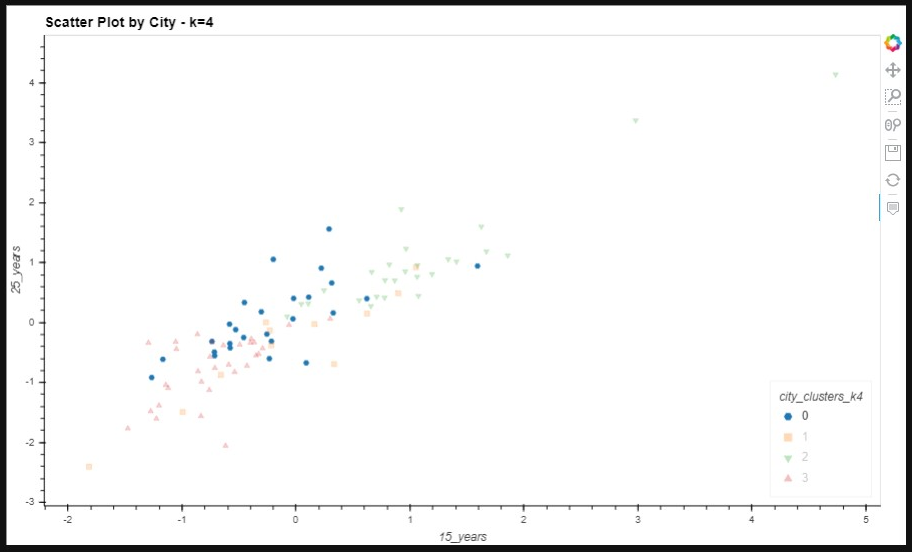



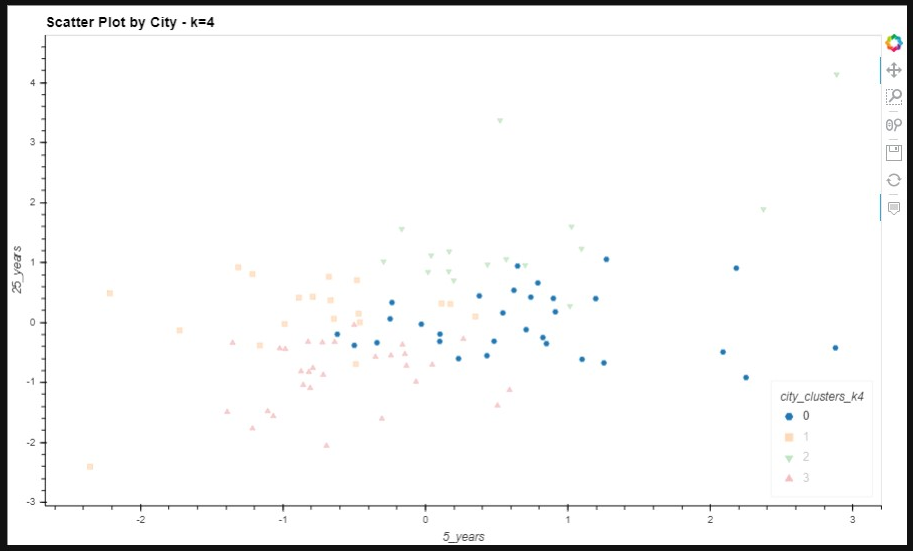

In [107]:
# Display only the Bay Area Cities in the optimal cluter
bayarea_0_cities = growth_df_scaled[growth_df_scaled["city_clusters_k4"].isin(["0"])].dropna()

bayarea_0_cities

,25_years,20_years,15_years,10_years,5_years,1_year,6_months,3_months,1_month,city_clusters_k4
City,,,,,,,,,,
Point Reyes Station,-0.671946,-0.494426,0.089257,0.085412,1.252987,2.065609,1.079304,1.063139,0.546661,0
Antioch,-0.612849,-0.015652,-1.168430,0.274373,1.099796,-0.337123,0.033585,0.151346,0.806917,0
Discovery Bay,-0.601384,0.161298,-0.234087,1.360288,0.232538,0.089938,0.533280,0.757126,1.110549,0
Oakley,-0.552067,0.423300,-0.713777,0.991814,0.431850,0.071280,0.536589,1.618959,1.992528,0
Richmond,-0.491116,0.457897,-0.716440,1.132316,2.088948,0.558460,0.864204,0.775862,1.327429,0
El Sobrante,-0.421483,-0.000696,-0.578206,0.516364,2.877963,0.168716,1.353971,1.625204,2.310618,0
San Martin,-0.350837,-0.991761,-0.580603,-0.285805,0.849419,2.724858,1.949633,1.793823,1.269594,0
Brentwood,-0.314334,0.316625,-0.737748,1.584907,0.100760,0.104449,0.632557,0.738391,1.226218,0
Morgan Hill,-0.311215,-0.604885,-0.215709,-0.085263,0.482090,1.416727,0.834421,0.738391,0.387615,0


In [108]:
# Display only the Bay Area Cities in the optimal cluter
bayarea_1_cities = growth_df_scaled[growth_df_scaled["city_clusters_k4"].isin(["1"])].dropna()

bayarea_1_cities

,25_years,20_years,15_years,10_years,5_years,1_year,6_months,3_months,1_month,city_clusters_k4
City,,,,,,,,,,
Tiburon,0.275447,0.155352,0.656308,0.381044,1.014141,0.415416,-0.634881,-0.997764,-0.537739,1
Brisbane,0.310348,0.077688,0.046375,0.009523,0.174885,-0.426266,-0.707684,-0.085971,-0.263025,1
San Bruno,0.317936,0.270856,0.107635,0.336547,0.113938,-0.961128,-0.701065,-0.441945,-0.884747,1
Belmont,0.416570,0.011017,0.776697,0.614197,-0.887568,-0.768329,-0.509130,-0.304551,-0.523281,1
Los Altos,0.445823,0.010296,1.073673,0.102479,0.378316,0.807233,0.185810,-0.085971,-0.263025,1
Alameda,0.703451,1.192186,0.865923,0.543794,0.198770,-0.596261,-0.191443,-0.079725,-0.349777,1
San Mateo,0.707245,0.409965,0.780425,0.800415,-0.480706,-1.106246,-0.896310,-0.548113,-0.783537,1
San Carlos,0.764402,0.357169,1.062486,1.009186,-0.677548,-0.820157,-0.720921,-0.504397,-0.740161,1
Albany,0.844658,1.121009,0.663499,0.213722,0.018400,-0.107008,0.053441,-0.085971,-0.450987,1


In [109]:
# Display only the Bay Area Cities in the optimal cluter
bayarea_2_cities = growth_df_scaled[growth_df_scaled["city_clusters_k4"].isin(["2"])].dropna()

bayarea_2_cities

,25_years,20_years,15_years,10_years,5_years,1_year,6_months,3_months,1_month,city_clusters_k4
City,,,,,,,,,,
San Quentin,-2.403352,-2.545931,-1.815917,-2.016930,-2.353588,-3.531782,-4.093033,-3.246023,-1.275131,2
San Geronimo,-1.491536,-1.235383,-0.993973,-1.652114,-1.390792,-0.299807,-0.896310,-1.235081,-1.477553,2
Half Moon Bay,-0.871490,-1.117896,-0.658909,-0.872498,-0.717081,-1.139415,-0.694447,-0.660526,-0.740161,2
Stanford,-0.692684,-0.610291,0.333497,-0.662507,-0.488119,-1.806956,-2.382158,-2.427907,-1.217297,2
Kentfield,-0.380596,-0.532808,-0.216508,-0.414115,-1.161829,-0.444924,-1.574704,-1.559829,-0.855830,2
Larkspur,-0.324029,-0.790485,-0.735883,-0.941987,-0.637191,0.160423,-0.893001,-1.091442,-0.523281,2
San Francisco,-0.130386,-0.714443,-0.229559,-0.704262,-1.725176,-2.752293,-2.908327,-2.802617,-1.781185,2
Millbrae,-0.023659,-0.204495,0.161171,-0.081300,-0.988048,-1.777933,-1.336439,-1.110177,-1.188379,2
Daly City,0.003656,-0.019977,-0.263918,0.077183,-0.460116,-1.817322,-1.869226,-1.728449,-1.578764,2


In [110]:
# Display only the Bay Area Cities in the optimal cluter
bayarea_3_cities = growth_df_scaled[growth_df_scaled["city_clusters_k4"].isin(["3"])].dropna()

bayarea_3_cities

,25_years,20_years,15_years,10_years,5_years,1_year,6_months,3_months,1_month,city_clusters_k4
City,,,,,,,,,,
La Honda,-2.055098,-2.260324,-0.618425,-2.578327,-0.694020,1.752570,0.576300,1.119346,-0.422070,3
Dillon Beach,-1.766531,-1.372330,-1.475527,-1.518927,-1.213716,0.262006,1.195127,1.625204,2.223866,3
Tomales,-1.602984,-1.090507,-1.224895,-1.118452,-0.305278,1.512090,1.261312,0.757126,0.590037,3
Lagunitas,-1.560411,-1.388727,-0.834165,-0.895966,-1.067114,0.995886,1.317569,0.919501,0.214111,3
Woodacre,-1.478806,-1.577751,-1.274968,-1.721602,-1.106647,0.660042,0.424075,-0.154667,-0.523281,3
San Pablo,-1.384808,-0.172240,-1.201989,-0.924005,0.505975,0.409196,0.794710,0.819578,1.125007,3
Nicasio,-1.124903,-1.066721,-0.761453,-0.315978,0.590807,0.639311,0.073296,-0.797919,-1.145003,3
Novato,-1.091351,-1.158981,-1.121553,-1.102603,-0.808502,0.181154,-0.168278,-0.060990,0.185194,3
Orinda,-1.041022,-0.760032,-1.142860,-1.128814,-0.857095,0.481755,1.079304,1.156817,1.428639,3


In [111]:
# Create a scatter plot using hvPlot by setting 
# `x="price_change_percentage_14d"` and `y="price_change_percentage_1y"`.
# Group the results by the clusters using `by="crypto_cluster_k4".
# Set the hover to the coin id using `hover_cols=["coin_id"]`.

growth_df_scaled.hvplot.scatter(
    title="Scatter Plot by City - k=4",
    x="1_month",
    y="1_year",
    by="city_clusters_k4",
    hover_cols=["City"],
    marker=["hex", "square", "inverted_triangle", "triangle"],
).opts(legend_position='bottom_right').opts(width=1000, height=600)

:NdOverlay   [city_clusters_k4]
   :Scatter   [1_month]   (1_year,City)

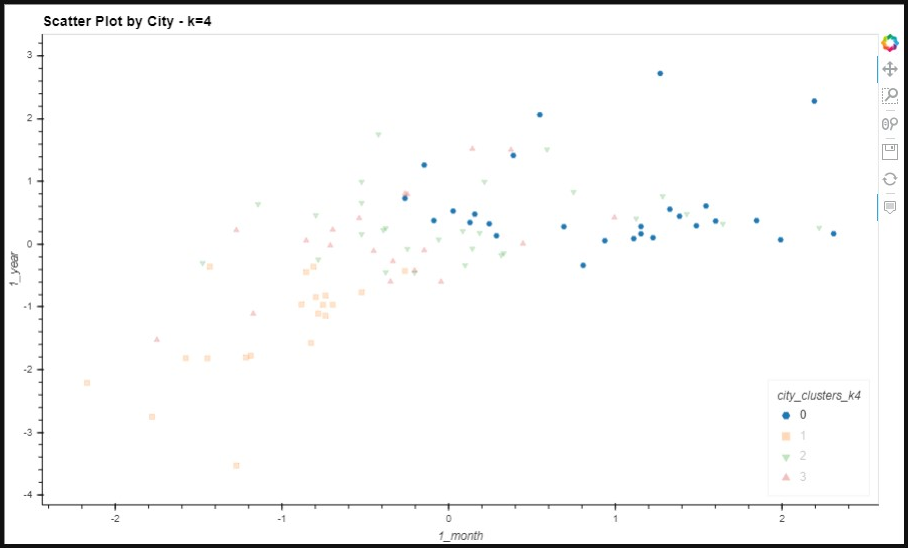

In [112]:
# Display only the Bay Area Cities in the optimal cluter
bayarea_0_cities = growth_df_scaled[growth_df_scaled["city_clusters_k4"].isin(["0"])].dropna()

bayarea_0_cities

,25_years,20_years,15_years,10_years,5_years,1_year,6_months,3_months,1_month,city_clusters_k4
City,,,,,,,,,,
Point Reyes Station,-0.671946,-0.494426,0.089257,0.085412,1.252987,2.065609,1.079304,1.063139,0.546661,0
Antioch,-0.612849,-0.015652,-1.168430,0.274373,1.099796,-0.337123,0.033585,0.151346,0.806917,0
Discovery Bay,-0.601384,0.161298,-0.234087,1.360288,0.232538,0.089938,0.533280,0.757126,1.110549,0
Oakley,-0.552067,0.423300,-0.713777,0.991814,0.431850,0.071280,0.536589,1.618959,1.992528,0
Richmond,-0.491116,0.457897,-0.716440,1.132316,2.088948,0.558460,0.864204,0.775862,1.327429,0
El Sobrante,-0.421483,-0.000696,-0.578206,0.516364,2.877963,0.168716,1.353971,1.625204,2.310618,0
San Martin,-0.350837,-0.991761,-0.580603,-0.285805,0.849419,2.724858,1.949633,1.793823,1.269594,0
Brentwood,-0.314334,0.316625,-0.737748,1.584907,0.100760,0.104449,0.632557,0.738391,1.226218,0
Morgan Hill,-0.311215,-0.604885,-0.215709,-0.085263,0.482090,1.416727,0.834421,0.738391,0.387615,0


In [113]:
# Display only the Bay Area Cities in the optimal cluter
bayarea_1_cities = growth_df_scaled[growth_df_scaled["city_clusters_k4"].isin(["1"])].dropna()

bayarea_1_cities

,25_years,20_years,15_years,10_years,5_years,1_year,6_months,3_months,1_month,city_clusters_k4
City,,,,,,,,,,
Tiburon,0.275447,0.155352,0.656308,0.381044,1.014141,0.415416,-0.634881,-0.997764,-0.537739,1
Brisbane,0.310348,0.077688,0.046375,0.009523,0.174885,-0.426266,-0.707684,-0.085971,-0.263025,1
San Bruno,0.317936,0.270856,0.107635,0.336547,0.113938,-0.961128,-0.701065,-0.441945,-0.884747,1
Belmont,0.416570,0.011017,0.776697,0.614197,-0.887568,-0.768329,-0.509130,-0.304551,-0.523281,1
Los Altos,0.445823,0.010296,1.073673,0.102479,0.378316,0.807233,0.185810,-0.085971,-0.263025,1
Alameda,0.703451,1.192186,0.865923,0.543794,0.198770,-0.596261,-0.191443,-0.079725,-0.349777,1
San Mateo,0.707245,0.409965,0.780425,0.800415,-0.480706,-1.106246,-0.896310,-0.548113,-0.783537,1
San Carlos,0.764402,0.357169,1.062486,1.009186,-0.677548,-0.820157,-0.720921,-0.504397,-0.740161,1
Albany,0.844658,1.121009,0.663499,0.213722,0.018400,-0.107008,0.053441,-0.085971,-0.450987,1


In [114]:
# Display only the Bay Area Cities in the optimal cluter
bayarea_2_cities = growth_df_scaled[growth_df_scaled["city_clusters_k4"].isin(["2"])].dropna()

bayarea_2_cities

,25_years,20_years,15_years,10_years,5_years,1_year,6_months,3_months,1_month,city_clusters_k4
City,,,,,,,,,,
San Quentin,-2.403352,-2.545931,-1.815917,-2.016930,-2.353588,-3.531782,-4.093033,-3.246023,-1.275131,2
San Geronimo,-1.491536,-1.235383,-0.993973,-1.652114,-1.390792,-0.299807,-0.896310,-1.235081,-1.477553,2
Half Moon Bay,-0.871490,-1.117896,-0.658909,-0.872498,-0.717081,-1.139415,-0.694447,-0.660526,-0.740161,2
Stanford,-0.692684,-0.610291,0.333497,-0.662507,-0.488119,-1.806956,-2.382158,-2.427907,-1.217297,2
Kentfield,-0.380596,-0.532808,-0.216508,-0.414115,-1.161829,-0.444924,-1.574704,-1.559829,-0.855830,2
Larkspur,-0.324029,-0.790485,-0.735883,-0.941987,-0.637191,0.160423,-0.893001,-1.091442,-0.523281,2
San Francisco,-0.130386,-0.714443,-0.229559,-0.704262,-1.725176,-2.752293,-2.908327,-2.802617,-1.781185,2
Millbrae,-0.023659,-0.204495,0.161171,-0.081300,-0.988048,-1.777933,-1.336439,-1.110177,-1.188379,2
Daly City,0.003656,-0.019977,-0.263918,0.077183,-0.460116,-1.817322,-1.869226,-1.728449,-1.578764,2


In [115]:
# Display only the Bay Area Cities in the optimal cluter
bayarea_3_cities = growth_df_scaled[growth_df_scaled["city_clusters_k4"].isin(["3"])].dropna()

bayarea_3_cities

,25_years,20_years,15_years,10_years,5_years,1_year,6_months,3_months,1_month,city_clusters_k4
City,,,,,,,,,,
La Honda,-2.055098,-2.260324,-0.618425,-2.578327,-0.694020,1.752570,0.576300,1.119346,-0.422070,3
Dillon Beach,-1.766531,-1.372330,-1.475527,-1.518927,-1.213716,0.262006,1.195127,1.625204,2.223866,3
Tomales,-1.602984,-1.090507,-1.224895,-1.118452,-0.305278,1.512090,1.261312,0.757126,0.590037,3
Lagunitas,-1.560411,-1.388727,-0.834165,-0.895966,-1.067114,0.995886,1.317569,0.919501,0.214111,3
Woodacre,-1.478806,-1.577751,-1.274968,-1.721602,-1.106647,0.660042,0.424075,-0.154667,-0.523281,3
San Pablo,-1.384808,-0.172240,-1.201989,-0.924005,0.505975,0.409196,0.794710,0.819578,1.125007,3
Nicasio,-1.124903,-1.066721,-0.761453,-0.315978,0.590807,0.639311,0.073296,-0.797919,-1.145003,3
Novato,-1.091351,-1.158981,-1.121553,-1.102603,-0.808502,0.181154,-0.168278,-0.060990,0.185194,3
Orinda,-1.041022,-0.760032,-1.142860,-1.128814,-0.857095,0.481755,1.079304,1.156817,1.428639,3


---

In [116]:
growth_df_scaled.drop(columns=["city_clusters_k4"]).hvplot()


:NdOverlay   [Variable]
   :Curve   [City]   (value)

# Find the Best Value for k

In this section, you will use the elbow method to find the best value for k.

1. Code the elbow method algorithm to find the best value for k. Use a range from 1 to 11. 

2. Plot a line chart with all the inertia values computed with the different values of k to visually identify the optimal value for k.

3. Answer the following question: What is the best value for k?

In [117]:
# Create a list with the number of k-values to try
# We use a range from 1 to 11
k = list(range(1, 11))

In [118]:
# Create an empty list to store the inertia values
inertia = []

In [119]:
# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using `df_market_data_scaled`
# 3. Append the model.inertia_ to the inirtia list
for i in k:
    model = KMeans(n_clusters=i, random_state=0)
    model.fit(growth_df)
    inertia.append(model.inertia_)
    
# View the inertia list
inertia

[186.30449960627652,
 88.0942931310858,
 55.337330479697634,
 34.282980516639554,
 25.65288912062807,
 20.947311618093586,
 17.139383609653837,
 15.053628270858495,
 13.131203123851934,
 11.473781206135387]

In [120]:
# Create a dictionary with the data to plot the Elbow curve
elbow_data = {
    "k": k,
    "inertia": inertia
}

# Create a DataFrame with the data to plot the Elbow curve
df_elbow = pd.DataFrame(elbow_data)

In [121]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
df_elbow.hvplot.line(x="k", y="inertia", title="Elbow Curve", xticks=k)

:Curve   [k]   (inertia)

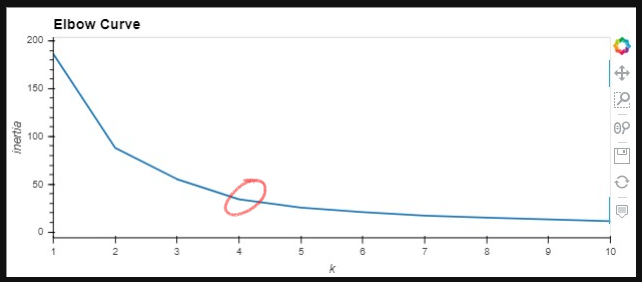

#### 3. Answer the following question: What is the best value for k?
**Question:** What is the best value for `k`?

**Answer:** 
# THE BEST VALUE FOR `k` IS 4 (k=4).

---

In [122]:
# Create a PCA model instance and set `n_components=4`.
pca = PCA(n_components=4)

In [123]:
# Use the PCA model with `fit_transform` to reduce to 
# three principal components.
growth_pca_data = pca.fit_transform(growth_df)

# View the first five rows of the DataFrame. 
growth_pca_data[:5]

array([[-3.32216211, -0.22908903, -0.10835942, -0.02184649],
       [-2.82285863, -0.41312497, -0.11901129,  0.3549862 ],
       [-2.35071163,  0.08225932,  0.0177855 ,  0.10123073],
       [-2.06877977,  0.18141056, -0.06268627,  0.12808079],
       [-2.04005292, -0.00702975, -0.21649972,  0.09019627]])

In [124]:
# Retrieve the explained variance to determine how much information 
# can be attributed to each principal component.
pca.explained_variance_ratio_

array([0.93614278, 0.03620685, 0.01393995, 0.00850234])

# Finding Cities Where Growth is Higher than the Mean Growth

In [125]:
# Find the Mean Growth for 5 Years, 10 Years, and 25 Years
five_year_growth_mean = growth_df['5_years'].mean()
five_year_growth_mean

ten_year_growth_mean = growth_df['10_years'].mean()
ten_year_growth_mean

twentyfive_year_growth_mean = growth_df['25_years'].mean()
twentyfive_year_growth_mean

print(f"The Mean for 5 Year Growth is: {five_year_growth_mean}")
print(f"The Mean for 10 Year Growth is: {ten_year_growth_mean}")
print(f"The Mean for 25 Year Growth is: {twentyfive_year_growth_mean}")

The Mean for 5 Year Growth is: 0.3125659574468086
The Mean for 10 Year Growth is: 1.0498755319148936
The Mean for 25 Year Growth is: 3.525863829787235


In [126]:
# Find Cities where 5 Year Growth is above or below the mean 5 year growth
five_year_growth_df = growth_df.copy()

# create a list of our conditions
conditions = [
    (five_year_growth_df['5_years'] > five_year_growth_mean),
    (five_year_growth_df['5_years'] <= five_year_growth_mean)
    ]

# create a list of the values we want to assign for each condition
values = ['1', '0']

# create a new column and use np.select to assign values to it using our lists as arguments
five_year_growth_df['Status'] = np.select(conditions, values)

# display updated DataFrame
five_year_growth_df.tail()

,25_years,20_years,15_years,10_years,5_years,1_year,6_months,3_months,1_month,Status
Martinez,5.3778,2.6691,0.7042,1.3303,0.2924,0.1110,0.0834,0.0346,0.0145,0
Berkeley,5.4246,2.6711,1.2055,1.4759,0.4371,0.0616,0.0550,0.0270,0.0073,1
El Cerrito,5.7699,2.8422,0.9420,1.5217,0.6006,0.0909,0.0637,0.0237,0.0107,1
Atherton,7.5280,2.6280,1.7140,1.9401,0.3762,0.0169,0.0123,-0.0004,-0.0045,1
Ross,8.4365,4.1925,2.3727,2.1509,0.6630,0.1631,0.0613,0.0301,0.0102,1


In [127]:
# Find Cities where 10 Year Growth is above or below the mean 10 year growth
ten_year_growth_df = growth_df.copy()

# create a list of our conditions
conditions = [
    (ten_year_growth_df['10_years'] > ten_year_growth_mean),
    (ten_year_growth_df['10_years'] <= ten_year_growth_mean)
    ]

# create a list of the values we want to assign for each condition
values = ['1', '0']

# create a new column and use np.select to assign values to it using our lists as arguments
ten_year_growth_df['Status'] = np.select(conditions, values)

# display updated DataFrame
ten_year_growth_df.tail(10)

,25_years,20_years,15_years,10_years,5_years,1_year,6_months,3_months,1_month,Status
Pleasant Hill,4.7770,2.1606,0.5205,1.3877,0.4668,0.0932,0.0733,0.0319,0.0141,1
Sunnyvale,4.7807,1.9345,1.0967,1.3577,0.3814,0.1016,0.0547,0.0149,0.0028,1
Cupertino,4.8542,2.0000,1.2927,1.1782,0.3175,0.1289,0.0723,0.0264,0.0059,1
Mountain View,4.9334,2.0335,1.2223,1.2802,0.3328,0.1013,0.0429,0.0072,-0.0012,1
Oakland,4.9877,2.6474,0.9577,1.4995,0.4456,0.0774,0.0623,0.0265,0.0053,1
Martinez,5.3778,2.6691,0.7042,1.3303,0.2924,0.1110,0.0834,0.0346,0.0145,1
Berkeley,5.4246,2.6711,1.2055,1.4759,0.4371,0.0616,0.0550,0.0270,0.0073,1
El Cerrito,5.7699,2.8422,0.9420,1.5217,0.6006,0.0909,0.0637,0.0237,0.0107,1
Atherton,7.5280,2.6280,1.7140,1.9401,0.3762,0.0169,0.0123,-0.0004,-0.0045,1
Ross,8.4365,4.1925,2.3727,2.1509,0.6630,0.1631,0.0613,0.0301,0.0102,1


In [128]:
# Find Cities where 25 Year Growth is above or below the mean 25 year growth
twentyfive_year_growth_df = growth_df.copy()

# create a list of our conditions
conditions = [
    (twentyfive_year_growth_df['25_years'] > twentyfive_year_growth_mean),
    (twentyfive_year_growth_df['25_years'] <= twentyfive_year_growth_mean)
    ]

# create a list of the values we want to assign for each condition
values = ['1', '0']

# create a new column and use np.select to assign values to it using our lists as arguments
twentyfive_year_growth_df['Status'] = np.select(conditions, values)

# display updated DataFrame
twentyfive_year_growth_df.tail()

,25_years,20_years,15_years,10_years,5_years,1_year,6_months,3_months,1_month,Status
Martinez,5.3778,2.6691,0.7042,1.3303,0.2924,0.1110,0.0834,0.0346,0.0145,1
Berkeley,5.4246,2.6711,1.2055,1.4759,0.4371,0.0616,0.0550,0.0270,0.0073,1
El Cerrito,5.7699,2.8422,0.9420,1.5217,0.6006,0.0909,0.0637,0.0237,0.0107,1
Atherton,7.5280,2.6280,1.7140,1.9401,0.3762,0.0169,0.0123,-0.0004,-0.0045,1
Ross,8.4365,4.1925,2.3727,2.1509,0.6630,0.1631,0.0613,0.0301,0.0102,1


## Prepare the 25 Year Data for the Linear SVM Model

In [129]:
# Segment the features from the target
y = twentyfive_year_growth_df["Status"]
X = twentyfive_year_growth_df.drop(columns="Status")

In [130]:
# Use the train_test_split function to create training and testing subsets
# X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, stratify=y)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
X_train.shape

(70, 9)

In [131]:
# Scale the data
scaler = StandardScaler()
X_scaler = scaler.fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [132]:
# Instantiate a linear SVM model
svm_model = SVC(kernel='linear')
svm_model

SVC(kernel='linear')

In [133]:
# Fit the data
svm_model.fit(X_train_scaled, y_train)

SVC(kernel='linear')

In [134]:
# Score the accuracy
print(f"Training Data Score: {svm_model.score(X_train_scaled, y_train)}")
print(f"Testing Data Score: {svm_model.score(X_test_scaled, y_test)}")

Training Data Score: 1.0
Testing Data Score: 1.0


In [135]:
# Make predictions using the test data
y_pred = svm_model.predict(X_test_scaled)

results = pd.DataFrame({
    "Prediction": y_pred, 
    "Actual": y_test
}).reset_index(drop=True)

results.head()

,Prediction,Actual
0,0,0
1,0,0
2,0,0
3,1,1
4,1,1


In [136]:
# Create a confusion matrix
confusion_matrix(y_test, y_pred)

NameError: name 'confusion_matrix' is not defined

In [137]:
# Print the classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00        10

    accuracy                           1.00        24
   macro avg       1.00      1.00      1.00        24
weighted avg       1.00      1.00      1.00        24



In [138]:
# Segment the features from the target
y2 = ten_year_growth_df["Status"]
X2 = ten_year_growth_df.drop(columns="Status")

In [66]:
# Use the train_test_split function to create training and testing subsets
# X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, stratify=y)
X_train_tenyear, X_test_tenyear, y_train_tenyear, y_test_tenyear = train_test_split(X2, y2, random_state=1)
X_train_tenyear.shape

(70, 9)

In [67]:
# Scale the data
scaler_tenyear = StandardScaler()
X_scaler_tenyear = scaler_tenyear.fit(X_train_tenyear)
X_train_scaled_tenyear = X_scaler_tenyear.transform(X_train_tenyear)
X_test_scaled_tenyear = X_scaler_tenyear.transform(X_test_tenyear)

In [68]:
# Instantiate a linear SVM model
svm_model = SVC(kernel='linear')
svm_model

SVC(kernel='linear')

In [69]:
# Fit the data
svm_model.fit(X_train_scaled_tenyear, y_train_tenyear)

SVC(kernel='linear')

In [70]:
# Score the accuracy
print(f"Training Data Score: {svm_model.score(X_train_scaled_tenyear, y_train_tenyear)}")
print(f"Testing Data Score: {svm_model.score(X_test_scaled_tenyear, y_test_tenyear)}")

Training Data Score: 0.9714285714285714
Testing Data Score: 1.0


In [71]:
# Make predictions using the test data
y_pred_tenyear = svm_model.predict(X_test_scaled_tenyear)

results = pd.DataFrame({
    "Prediction": y_pred_tenyear, 
    "Actual": y_test_tenyear
}).reset_index(drop=True)

results.head()

,Prediction,Actual
0,1,1
1,0,0
2,0,0
3,1,1
4,1,1


In [72]:
# Create a confusion matrix
confusion_matrix(y_test_tenyear, y_pred_tenyear)

NameError: name 'confusion_matrix' is not defined

In [73]:
# Print the classification report
print(classification_report(y_test_tenyear, y_pred_tenyear))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      1.00      1.00        11

    accuracy                           1.00        24
   macro avg       1.00      1.00      1.00        24
weighted avg       1.00      1.00      1.00        24



In [74]:
# Combine Cities in Cluster 2 & 3 to display only the Bay Area Cities in cluster 2 and cluster 3 
bayarea_cities = growth_df_scaled[growth_df_scaled["city_clusters_k4"].isin(["2", "3"])].dropna()
bayarea_cities

,25_years,20_years,15_years,10_years,5_years,1_year,6_months,3_months,1_month,city_clusters_k4
City,,,,,,,,,,
La Honda,-2.055098,-2.260324,-0.618425,-2.578327,-0.694020,1.752570,0.576300,1.119346,-0.422070,3
Dillon Beach,-1.766531,-1.372330,-1.475527,-1.518927,-1.213716,0.262006,1.195127,1.625204,2.223866,3
Tomales,-1.602984,-1.090507,-1.224895,-1.118452,-0.305278,1.512090,1.261312,0.757126,0.590037,3
Lagunitas,-1.560411,-1.388727,-0.834165,-0.895966,-1.067114,0.995886,1.317569,0.919501,0.214111,3
San Geronimo,-1.491536,-1.235383,-0.993973,-1.652114,-1.390792,-0.299807,-0.896310,-1.235081,-1.477553,3
Woodacre,-1.478806,-1.577751,-1.274968,-1.721602,-1.106647,0.660042,0.424075,-0.154667,-0.523281,3
Nicasio,-1.124903,-1.066721,-0.761453,-0.315978,0.590807,0.639311,0.073296,-0.797919,-1.145003,3
Novato,-1.091351,-1.158981,-1.121553,-1.102603,-0.808502,0.181154,-0.168278,-0.060990,0.185194,3
Orinda,-1.041022,-0.760032,-1.142860,-1.128814,-0.857095,0.481755,1.079304,1.156817,1.428639,3


In [75]:
# Create a For Loop to convert 'city_clusters_k4' into a Column named 'status'
status_list=[]
for i in bayarea_cities['city_clusters_k4']:
    if i ==2:
        status_list.append(1)
    else:
        status_list.append(-1)
bayarea_cities["status"]=status_list
bayarea_cities.drop(columns=["city_clusters_k4"],inplace= True)
bayarea_cities

,25_years,20_years,15_years,10_years,5_years,1_year,6_months,3_months,1_month,status
City,,,,,,,,,,
La Honda,-2.055098,-2.260324,-0.618425,-2.578327,-0.694020,1.752570,0.576300,1.119346,-0.422070,-1
Dillon Beach,-1.766531,-1.372330,-1.475527,-1.518927,-1.213716,0.262006,1.195127,1.625204,2.223866,-1
Tomales,-1.602984,-1.090507,-1.224895,-1.118452,-0.305278,1.512090,1.261312,0.757126,0.590037,-1
Lagunitas,-1.560411,-1.388727,-0.834165,-0.895966,-1.067114,0.995886,1.317569,0.919501,0.214111,-1
San Geronimo,-1.491536,-1.235383,-0.993973,-1.652114,-1.390792,-0.299807,-0.896310,-1.235081,-1.477553,-1
Woodacre,-1.478806,-1.577751,-1.274968,-1.721602,-1.106647,0.660042,0.424075,-0.154667,-0.523281,-1
Nicasio,-1.124903,-1.066721,-0.761453,-0.315978,0.590807,0.639311,0.073296,-0.797919,-1.145003,-1
Novato,-1.091351,-1.158981,-1.121553,-1.102603,-0.808502,0.181154,-0.168278,-0.060990,0.185194,-1
Orinda,-1.041022,-0.760032,-1.142860,-1.128814,-0.857095,0.481755,1.079304,1.156817,1.428639,-1


In [76]:
# Segment the features from the target
y3 = bayarea_cities["status"]
X3 = bayarea_cities.drop(columns="status")

In [77]:
# Use the train_test_split function to create training and testing subsets
# X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, stratify=y)
X_train3, X_test3, y_train3, y_test3 = train_test_split(X3, y3, random_state=1)
X_train3.shape

(35, 9)

In [78]:
# Scale the data
scaler3 = StandardScaler()
X_scaler3 = scaler3.fit(X_train3)
X_train_scaled3 = X_scaler3.transform(X_train3)
X_test_scaled3 = X_scaler3.transform(X_test3)

In [79]:
# Instantiate a linear SVM model
svm_model2 = SVC(kernel='linear')
svm_model2

SVC(kernel='linear')

In [80]:
# Fit the data
svm_model2.fit(X_train_scaled3, y_train3)

SVC(kernel='linear')

In [81]:
# Score the accuracy
print(f"Training Data Score: {svm_model2.score(X_train_scaled3, y_train3)}")
print(f"Testing Data Score: {svm_model2.score(X_test_scaled3, y_test3)}")

Training Data Score: 1.0
Testing Data Score: 1.0


In [82]:
# Make predictions using the test data
y_pred3 = svm_model2.predict(X_test_scaled3)

results = pd.DataFrame({
    "Prediction": y_pred3, 
    "Actual": y_test3
}).reset_index(drop=True)

results.head()

,Prediction,Actual
0,-1,-1
1,-1,-1
2,1,1
3,1,1
4,-1,-1


In [83]:
# Create a confusion matrix
confusion_matrix(y_test3, y_pred3)

NameError: name 'confusion_matrix' is not defined

In [84]:
# Print the classification report
print(classification_report(y_test3, y_pred3))

              precision    recall  f1-score   support

          -1       1.00      1.00      1.00         6
           1       1.00      1.00      1.00         6

    accuracy                           1.00        12
   macro avg       1.00      1.00      1.00        12
weighted avg       1.00      1.00      1.00        12



In [85]:
# Create a predictions DataFrame
predictions_df = pd.DataFrame(index=X_test3.index)

# Add the SVM model predictions to the DataFrame
predictions_df['Predicted'] = bayarea_cities['status']

# Add the actual returns to the DataFrame
predictions_df['25 Year Growth'] = growth_df["25_years"]

# Add the strategy returns to the DataFrame
predictions_df['Strategy Growth'] = (predictions_df["25 Year Growth"] * predictions_df['Predicted'])

# Review the DataFrame
display(predictions_df.head())
display(predictions_df.tail())

,Predicted,25 Year Growth,Strategy Growth
City,,,
Larkspur,-1,3.1415,-3.1415
Clayton,-1,3.1245,-3.1245
Cupertino,1,4.8542,4.8542
Santa Clara,1,4.6622,4.6622
Tomales,-1,1.6244,-1.6244


,Predicted,25 Year Growth,Strategy Growth
City,,,
Albany,1,4.5278,4.5278
Atherton,1,7.5280,7.5280
Pacifica,-1,3.2023,-3.2023
Alamo,-1,3.0012,-3.0012
Fremont,1,4.6751,4.6751
